In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [30]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [9]:
X_train= X_train/255
X_test= X_test/255

In [10]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation= 'sigmoid')

])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.8134 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 185s 118ms/step - loss: 1.6234 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.5413 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4797 - accuracy: 0.4812
Epoch 5/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4331 - accuracy: 0.4957


In [11]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 18s 57ms/step - loss: 1.4854 - accuracy: 0.4671


[1.4854038953781128, 0.46709999442100525]

In [14]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [15]:
from sklearn.metrics import classification_report
yp= ann.predict(X_test)
yp=np.argmax(yp,axis=1
             )
print("Classification Report:\n", classification_report(y_test, yp))

313/313 [==============================] - 8s 26ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.41      0.51      1000
           1       0.70      0.47      0.56      1000
           2       0.43      0.24      0.31      1000
           3       0.33      0.31      0.32      1000
           4       0.44      0.41      0.42      1000
           5       0.28      0.59      0.37      1000
           6       0.52      0.54      0.53      1000
           7       0.72      0.37      0.49      1000
           8       0.52      0.71      0.60      1000
           9       0.50      0.62      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [25]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6004 - accuracy: 0.4246
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.2970 - accuracy: 0.5411
Epoch 3/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1723 - accuracy: 0.5896
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0916 - accuracy: 0.6174
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0268 - accuracy: 0.6430
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9709 - accuracy: 0.6632
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9303 - accuracy: 0.6764
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8920 - accuracy: 0.6901
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8630 - accuracy: 0.7017
Epoch 10/10
1563/1563 [==============================] - 39s 25m

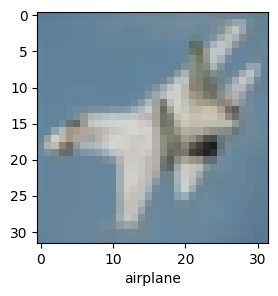

In [33]:
plot_sample(X_test,y_test,10)

In [34]:
classes[y_test[10]]

'airplane'

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.1187 - accuracy: 0.6131


[1.1187011003494263, 0.613099992275238]

In [28]:
yp = cnn.predict(X_test)
yp = np.argmax(yp, axis=1)
print("Classification Report:\n", classification_report(y_test, yp))

313/313 [==============================] - 2s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.53      0.62      1000
           1       0.77      0.75      0.76      1000
           2       0.40      0.59      0.48      1000
           3       0.41      0.45      0.43      1000
           4       0.66      0.39      0.49      1000
           5       0.48      0.61      0.54      1000
           6       0.63      0.80      0.70      1000
           7       0.77      0.63      0.69      1000
           8       0.77      0.74      0.75      1000
           9       0.79      0.63      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.62     10000
weighted avg       0.64      0.61      0.62     10000

